## Download the dataset from this [link](https://www.kaggle.com/datasets/ashishraut64/global-methane-emissions). You can find the dataset description there itself. Read it carefully and answer the questions below

**Make sure you write necessary Python code and use necessary visuals to support your answer**


In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
df=pd.read_csv(r"C:\Users\lenovo\Downloads\Methane_final.csv")

In [3]:
df

,Unnamed: 0,region,country,emissions,type,segment,reason,baseYear,notes
0,0,Africa,Algeria,257.611206,Agriculture,Total,All,2019-2021,Average based on United Nations Framework Conv...
1,1,Africa,Algeria,0.052000,Energy,Bioenergy,All,2022,Estimates from end-uses are for 2020 or 2021 (...
2,2,Africa,Algeria,130.798996,Energy,Gas pipelines and LNG facilities,Fugitive,2022,Not available
3,3,Africa,Algeria,69.741898,Energy,Gas pipelines and LNG facilities,Vented,2022,Not available
4,4,Africa,Algeria,213.987000,Energy,Onshore gas,Fugitive,2022,Not available
...,...,...,...,...,...,...,...,...,...
1543,1543,World,World,3102.500000,Energy,Satellite-detected large oil and gas emissions,All,2022,Not available
1544,1544,World,World,30296.500000,Energy,Steam coal,All,2022,Not available
1545,1545,World,World,133350.984375,Energy,Total,All,2022,Estimates from end-uses are for 2020 or 2021 (...
1546,1546,World,World,9737.874023,Other,Total,All,2019-2021,Average based on United Nations Framework Conv...


#### Find out the dataset dimensions

In [4]:
df.shape

(1548, 9)

#### Find out statistical summary of the Dataset

In [5]:
df.describe()

,Unnamed: 0,emissions
count,1548.000000,1548.000000
mean,773.500000,643.255972
std,447.013423,5566.238201
min,0.000000,0.000459
25%,386.750000,2.659361
50%,773.500000,24.064669
75%,1160.250000,128.419594
max,1547.000000,141953.765625


#### Check for the null values in Dataset

In [6]:
df.isnull().sum()

Unnamed: 0    0
region        0
country       0
emissions     0
type          0
segment       0
reason        0
baseYear      0
notes         0
dtype: int64

#### Check for the noise value of the dataset

In [8]:
for i in df.columns:
    unique_values = df[i].unique()
    print(f"{i}:\n {unique_values}\n")

Unnamed: 0:
 [   0    1    2 ... 1545 1546 1547]

region:
 ['Africa' 'Asia Pacific' 'Central and South America' 'Europe'
 'Middle East' 'North America' 'Other' 'Russia & Caspian' 'World']

country:
 ['Algeria' 'Angola' 'Benin' 'Botswana' 'Cameroon'
 'Central African Republic' 'Chad' 'Congo' "Cote d'Ivoire"
 'Democratic Republic of Congo' 'Egypt' 'Equatorial Guinea' 'Eritrea'
 'Ethiopia' 'Gabon' 'Gambia' 'Ghana' 'Guinea' 'Guinea-Bissau' 'Kenya'
 'Liberia' 'Libya' 'Morocco' 'Mozambique' 'Namibia' 'Niger' 'Nigeria'
 'Senegal' 'Seychelles' 'Sierra Leone' 'Somalia' 'South Africa'
 'South Sudan' 'Sudan' 'Tanzania' 'Togo' 'Tunisia' 'Australia'
 'Bangladesh' 'Brunei' 'China' 'India' 'Indonesia' 'Japan' 'Korea'
 'Malaysia' 'Mongolia' 'New Zealand' 'Other countries in Southeast Asia'
 'Pakistan' 'Philippines' 'Thailand' 'Vietnam' 'Argentina' 'Bolivia'
 'Brazil' 'Colombia' 'Cuba' 'Ecuador' 'Guyana' 'Paraguay' 'Peru'
 'Trinidad and Tobago' 'Uruguay' 'Venezuela' 'Denmark' 'Estonia'
 'European Union

#### Check the outliers for various Thresholds (1.5 x IQR , 2 X IQR and so on) for Numeric Columns

In [9]:
df.dtypes

Unnamed: 0      int64
region         object
country        object
emissions     float64
type           object
segment        object
reason         object
baseYear       object
notes          object
dtype: object

In [10]:
col=["Unnamed: 0","emissions"]

In [11]:
for c in col:  
    percentile25=df[c].quantile(0.25)
    percentile75=df[c].quantile(0.75)
    iqr=percentile75-percentile25
    upper_limit=percentile75+(1.5*iqr)
    lower_limit=percentile25-(1.5*iqr)
    print(c,':',df.shape[0]-(df[(df[c]<=upper_limit) & (df[c]>=lower_limit)].shape[0]))

Unnamed: 0 : 0
emissions : 253


In [12]:
for c in col:  
    percentile25=df[c].quantile(0.25)
    percentile75=df[c].quantile(0.75)
    iqr=percentile75-percentile25
    upper_limit=percentile75+(2*iqr)
    lower_limit=percentile25-(2*iqr)
    print(c,':',df.shape[0]-(df[(df[c]<=upper_limit) & (df[c]>=lower_limit)].shape[0]))

Unnamed: 0 : 0
emissions : 231


## Add the Cells below and Find out underlying Trends from the dataset 
- Make sure to write your hypothesis and test based on it
- if hypothesis is not correct, explain what could be the reason

In [13]:
df

,Unnamed: 0,region,country,emissions,type,segment,reason,baseYear,notes
0,0,Africa,Algeria,257.611206,Agriculture,Total,All,2019-2021,Average based on United Nations Framework Conv...
1,1,Africa,Algeria,0.052000,Energy,Bioenergy,All,2022,Estimates from end-uses are for 2020 or 2021 (...
2,2,Africa,Algeria,130.798996,Energy,Gas pipelines and LNG facilities,Fugitive,2022,Not available
3,3,Africa,Algeria,69.741898,Energy,Gas pipelines and LNG facilities,Vented,2022,Not available
4,4,Africa,Algeria,213.987000,Energy,Onshore gas,Fugitive,2022,Not available
...,...,...,...,...,...,...,...,...,...
1543,1543,World,World,3102.500000,Energy,Satellite-detected large oil and gas emissions,All,2022,Not available
1544,1544,World,World,30296.500000,Energy,Steam coal,All,2022,Not available
1545,1545,World,World,133350.984375,Energy,Total,All,2022,Estimates from end-uses are for 2020 or 2021 (...
1546,1546,World,World,9737.874023,Other,Total,All,2019-2021,Average based on United Nations Framework Conv...


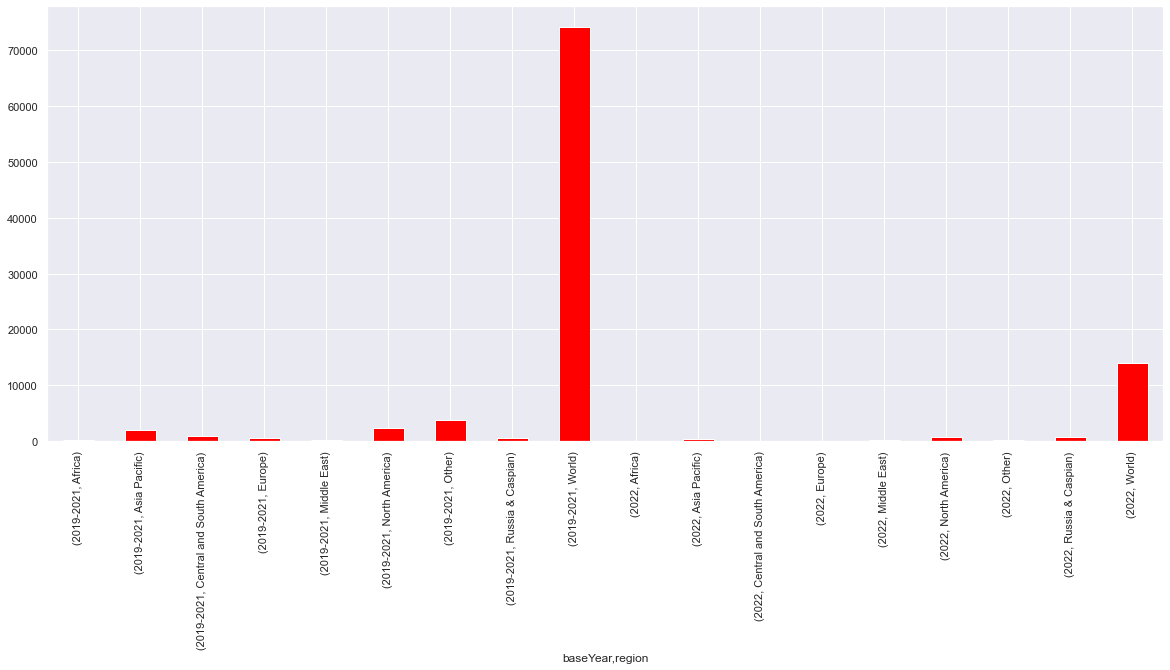

In [21]:
sns.set(rc={'figure.figsize':(20,8)})
da=df.groupby(["baseYear","region"])["emissions"].mean().plot(kind="bar",color="red")

C:\Users\lenovo\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


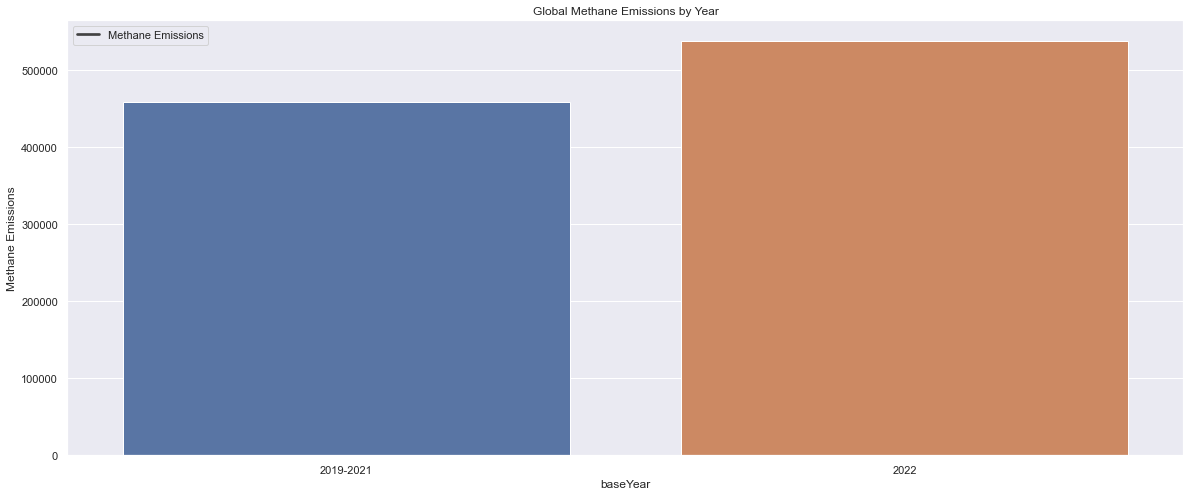

In [34]:
emissions_by_year = df.groupby('baseYear')['emissions'].sum().reset_index()
sns.barplot(emissions_by_year['baseYear'], emissions_by_year['emissions'])
plt.title('Global Methane Emissions by Year')
plt.xlabel('baseYear')
plt.ylabel('Methane Emissions')
plt.legend(['Methane Emissions'])

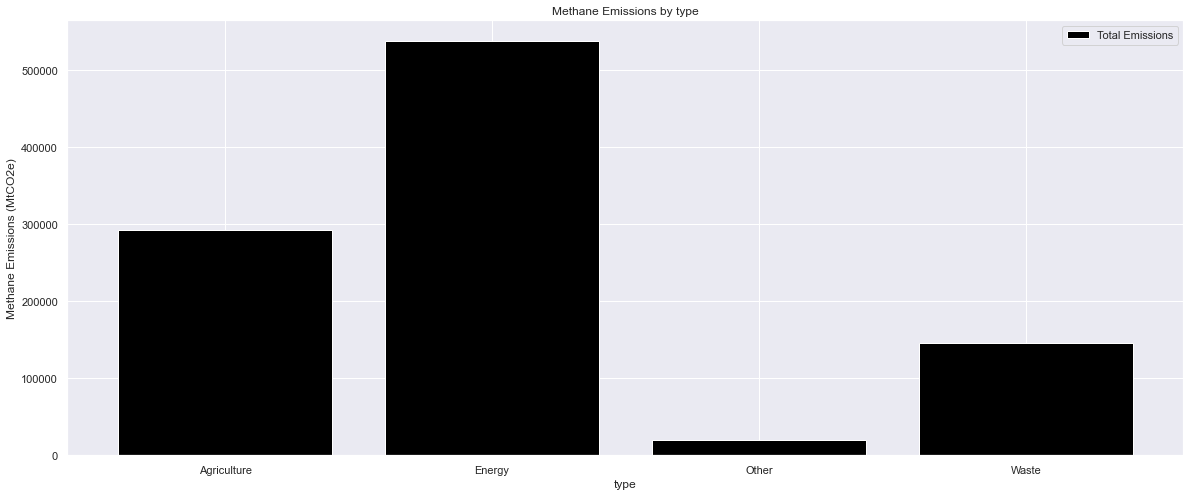

In [33]:

emissions_by_type = df.groupby('type')['emissions'].sum().reset_index()
plt.bar(emissions_by_sector['type'], emissions_by_sector['emissions'], label='Total Emissions',color="black")
plt.title('Methane Emissions by type')
plt.xlabel('type')
plt.ylabel('Methane Emissions (MtCO2e)')
plt.legend()


<AxesSubplot:>

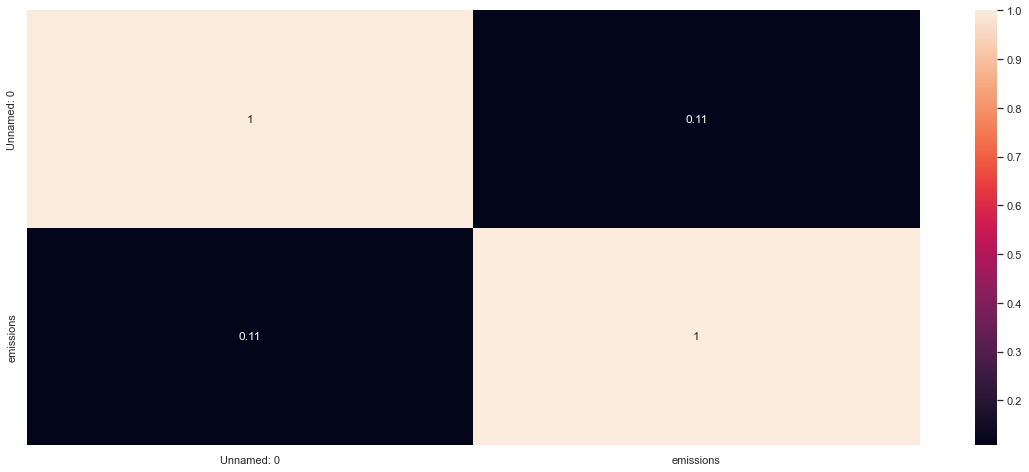

In [32]:
sns.heatmap(df.corr(),annot = True)

In [35]:
df.head(1)

,Unnamed: 0,region,country,emissions,type,segment,reason,baseYear,notes
0,0,Africa,Algeria,257.611206,Agriculture,Total,All,2019-2021,Average based on United Nations Framework Conv...


Text(0.5, 1.0, 'Methane Emissions from Fossil Fuel Production and Use')

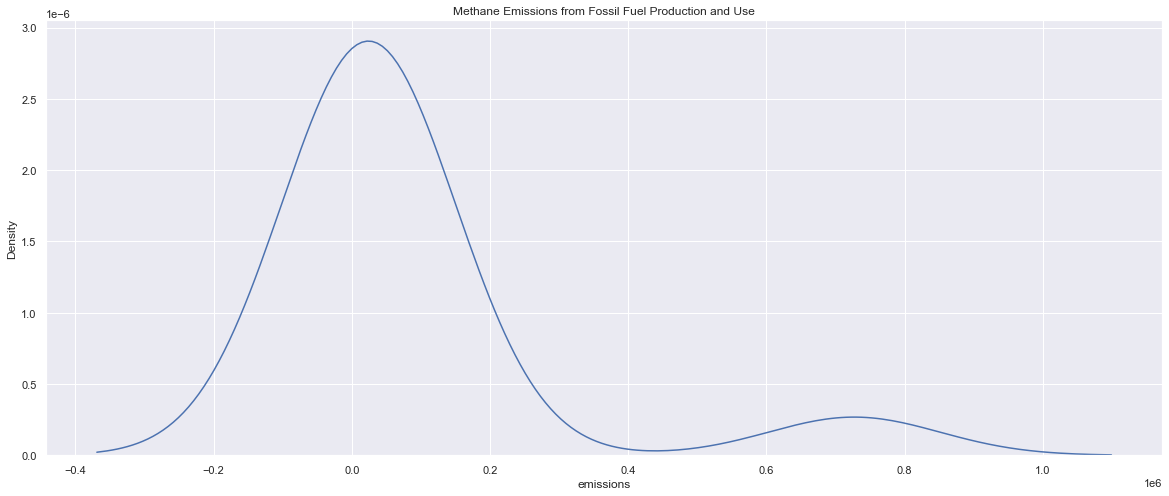

In [45]:
emissions_by_source =df.groupby('segment')['emissions'].sum().reset_index()
sns.kdeplot(emissions_by_source['emissions'])
plt.title('Methane Emissions from Fossil Fuel Production and Use')

In [49]:
df["country"].value_counts()

World                       22
Iran                        22
European Union              22
Russia                      22
Kazakhstan                  22
                            ..
Central African Republic     3
Liberia                      3
Sierra Leone                 3
Seychelles                   3
Gambia                       3
Name: country, Length: 105, dtype: int64

Text(0.5, 1.0, 'Methane Emissions across different region')

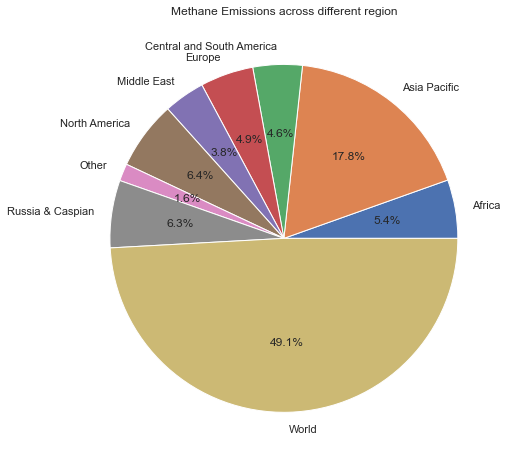

In [50]:
emissions_by_region =df.groupby('region')['emissions'].sum().reset_index()
plt.pie(emissions_by_region['emissions'], labels=emissions_by_region['region'], autopct='%1.1f%%')
plt.title('Methane Emissions across different region')



# Write a summery of the Analysis in bullet points in this section **(Mandatory)**

In [ ]:
1- From the 1st plot we conclude that the maximum emission is occured in the region (2019-2021world)
2- From this plot we conclude that the maximum emission in the year 2022
3 - In the above pie chart we see that the Methane Emissions across different region
4 - Methane emissions have a significant impact on climate change as methane is a potential greenhouse gas 
    with a much higher global warming potential than carbon dioxide.